In [1]:
!pip install wordcloud

In [2]:
!pip install textblob

In [3]:
!pip install keras

In [4]:
!pip install tensorflow

  Using cached numpy-1.24.3-cp39-cp39-win_amd64.whl (14.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Hp\\anaconda3\\Lib\\site-packages\\~0mpy\\.libs\\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [5]:
!pip install keras-utils

In [6]:
!pip install --upgrade numpy scipy seaborn

  Using cached numpy-1.25.2-cp39-cp39-win_amd64.whl (15.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
tensorflow-intel 2.13.0 requires numpy<=1.24.3,>=1.22, but you have numpy 1.25.2 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.25.2 which is incompatible.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

import re
import string
from wordcloud import WordCloud

from textblob import TextBlob

import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import word2vec

from collections import Counter
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.pipeline import Pipeline

import keras
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
# from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import pad_sequences
# from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
# from keras.layers.convolutional import Conv1D
# from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.optimizers import Adam

In [8]:
!pip install transformers

In [9]:
!pip install contractions

In [10]:
!pip install shap

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Hp\\anaconda3\\Lib\\site-packages\\~1mpy\\.libs\\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.




  Using cached numpy-1.21.6-cp39-cp39-win_amd64.whl (14.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2


In [11]:
!pip install --upgrade shap numba

  Using cached numba-0.57.1-cp39-cp39-win_amd64.whl (2.5 MB)
  Using cached llvmlite-0.40.1-cp39-cp39-win_amd64.whl (27.7 MB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.38.0


ERROR: Cannot uninstall 'llvmlite'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [12]:
import transformers
from transformers import (AutoTokenizer, 
                          AutoModelForSequenceClassification, 
                          TextClassificationPipeline)

import joblib
from tqdm import tqdm

import contractions
import shap

SystemError: initialization of _internal failed without raising an exception

In [13]:
tf.compat.v1.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [14]:
data=pd.read_csv("twitter_parsed_dataset.csv").drop(columns=['id','index','Annotation'])
data.columns=['text','label']


In [15]:
data

,text,label
0,@halalflaws @biebervalue @greenlinerzjm I read...,0.0
1,@ShreyaBafna3 Now you idiots claim that people...,0.0
2,"RT @Mooseoftorment Call me sexist, but when I ...",1.0
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",1.0
4,#mkr No No No No No No,0.0
...,...,...
16846,"Feeling so sorry for the girls, they should be...",0.0
16847,#MKR 'pretty good dishes we're happy with' - O...,0.0
16848,RT @colonelkickhead: Deconstructed lemon tart!...,0.0
16849,@versacezaynx @nyazpolitics @greenlinerzjm You...,0.0


In [16]:
data['text'].sample(1).values[0]

'Kat and Andre make me want to punch happy things 😡 #mkr'

In [17]:
data['text'][0]

'@halalflaws @biebervalue @greenlinerzjm I read them in context.No change in meaning. The history of Islamic slavery. https://t.co/xWJzpSodGj'

([<matplotlib.axis.XTick at 0x25c6092f7f0>,
 [Text(0, 0, 'positive'), Text(1, 0, 'negative')])

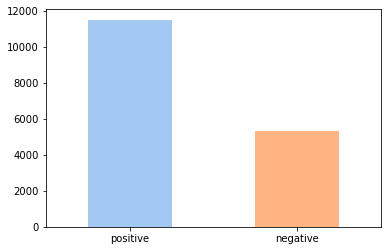

In [18]:
data['label'].value_counts().plot(kind='bar',color=sns.color_palette('pastel'))
plt.xticks([0,1],['positive','negative'],rotation=0)

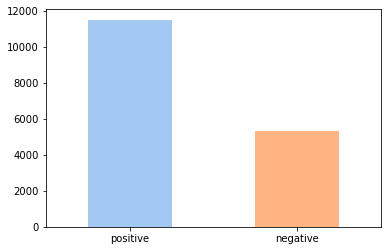

In [19]:
data['label'].value_counts().plot(kind='bar',color=sns.color_palette('pastel'))
plt.xticks([0,1],['positive','negative'],rotation=0);

# EDA

In [20]:
import nltk
nltk.download('words')

[nltk_data] Error loading words: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [21]:
only_english=set(nltk.corpus.words.words())
def clean_text(text):
    
    sample=text
    sample=" ".join([x.lower() for x in sample.split()])
    sample=re.sub(r"\S*https?:\S*",'',sample) #links and urls
    sample=re.sub('\[.*?\]','',sample) #text between square brackets
    sample=re.sub('\(.*?\)','',sample)
    sample=re.sub('#','',sample) #remove hashtags
    sample=''.join([x for x in sample.split() if not x.startswith('@')]) #remove mentions with @
    sample = " ".join([contractions.fix(x) for x in sample.split()])  # fixes contractions like you're to you are
    sample=re.sub('[%s]'% re.escape(string.punctuation),'',sample) #punctuation
    sample = re.sub('\w*\d\w', '', sample) #digits with trailing or preceeding text
    sample = re.sub(r'\n', ' ', sample) #new line character
    sample = re.sub(r'\\n', ' ', sample) #new line character
    sample = re.sub("[''""...“”‘’…]", '', sample) #list of quotation marks
    sample = " ".join(x.strip() for x in sample.split()) #strips whitespace
    sample = re.sub(r', /<[^>]+>/', '', sample)    #HTML attributes
    
    sample=''.join(list(filter(lambda ele: re.search("[a-zA-Z\s]+",ele) is not None,sample.split()))) #languages other than english
    sample = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE).sub(r'', sample) #emojis and symbols
    sample=sample.strip()
    sample=" ".join([x.strip() for x in sample.split()])
    return sample

In [22]:
import contractions

In [23]:
data['cleaned_text']=data['text'].apply(lambda x: clean_text(str(x)))
data

,text,label,cleaned_text
0,@halalflaws @biebervalue @greenlinerzjm I read...,0.0,ireadthemincontextnochangeinmeaningthehistoryo...
1,@ShreyaBafna3 Now you idiots claim that people...,0.0,nowyouidiotsclaimthatpeoplewhotriedtostophimfr...
2,"RT @Mooseoftorment Call me sexist, but when I ...",1.0,rtcallmesexistbutwhenigotoanautoplaceidrathert...
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",1.0,wrongisisfollowstheexampleofmohammedandthequra...
4,#mkr No No No No No No,0.0,mkrnononononono
...,...,...,...
16846,"Feeling so sorry for the girls, they should be...",0.0,feelingsosorryforthegirlstheyshouldbesafeandka...
16847,#MKR 'pretty good dishes we're happy with' - O...,0.0,mkrprettygooddisheswerehappywithokwellimnevere...
16848,RT @colonelkickhead: Deconstructed lemon tart!...,0.0,rtdeconstructedlemontartcanwepleasegojustonese...
16849,@versacezaynx @nyazpolitics @greenlinerzjm You...,0.0,youaretoostupidtotalktoblocked


In [24]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [25]:
stops=set(stopwords.words('english'))
lemmatizer=WordNetLemmatizer()
ps=PorterStemmer()

def get_wordnet_pos(word):
    treebank_tag=nltk.pos_tag([word])[0][1]
    
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
def correct_text(text,stem=False,lemma=False,spell=False):
    if lemma and stem:
        raise Exception('Either stem or lemma can be true,not both!')
        return text
    
    sample=text
    
    #removing stopwords
    sample=sample.lower()
    sample=[word for word in sample.split() if not word in stops]
    sample=''.join(sample)
    
    if lemma:
        sample=sample.split()
        sample=[lemmatizer.lemmatize(word.lower(),get_wordnet_pos(word.lower())) for word in sample]
        sample=''.join(sample)
        
    if spell:
        sample=str(TextBlob(text).correct())
        
    return sample

In [26]:
data['correct_text']='text'
data

,text,label,cleaned_text,correct_text
0,@halalflaws @biebervalue @greenlinerzjm I read...,0.0,ireadthemincontextnochangeinmeaningthehistoryo...,text
1,@ShreyaBafna3 Now you idiots claim that people...,0.0,nowyouidiotsclaimthatpeoplewhotriedtostophimfr...,text
2,"RT @Mooseoftorment Call me sexist, but when I ...",1.0,rtcallmesexistbutwhenigotoanautoplaceidrathert...,text
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",1.0,wrongisisfollowstheexampleofmohammedandthequra...,text
4,#mkr No No No No No No,0.0,mkrnononononono,text
...,...,...,...,...
16846,"Feeling so sorry for the girls, they should be...",0.0,feelingsosorryforthegirlstheyshouldbesafeandka...,text
16847,#MKR 'pretty good dishes we're happy with' - O...,0.0,mkrprettygooddisheswerehappywithokwellimnevere...,text
16848,RT @colonelkickhead: Deconstructed lemon tart!...,0.0,rtdeconstructedlemontartcanwepleasegojustonese...,text
16849,@versacezaynx @nyazpolitics @greenlinerzjm You...,0.0,youaretoostupidtotalktoblocked,text


In [27]:
!pip install tqdm

In [28]:
from tqdm import tqdm
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [WinError 10060] A connection attempt failed because
[nltk_data]     the connected party did not properly respond after a
[nltk_data]     period of time, or established connection failed
[nltk_data]     because connected host has failed to respond>
[nltk_data] Error loading wordnet: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading omw-1.4: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [29]:
count=0
for text in tqdm(data['cleaned_text']):
    data['correct_text'][count]=correct_text(text,lemma=True)
    count+=1

  0%|          | 0/16851 [00:00<?, ?it/s]C:\Users\Hp\AppData\Local\Temp\ipykernel_15344\716725424.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['correct_text'][count]=correct_text(text,lemma=True)
100%|██████████| 16851/16851 [13:46<00:00, 20.39it/s]


In [31]:
# data['word_count']=data['correct_text'].apply(lambda x: len(str(x).split("")))
# data['char_count']=data['correct_text'].str.len() #this also includes spaces
data['word_count'] = data['correct_text'].apply(lambda x: len(str(x).split()))
data['char_count'] = data['correct_text'].str.len()


In [32]:
data

,text,label,cleaned_text,correct_text,word_count,char_count
0,@halalflaws @biebervalue @greenlinerzjm I read...,0.0,ireadthemincontextnochangeinmeaningthehistoryo...,ireadthemincontextnochangeinmeaningthehistoryo...,1,61
1,@ShreyaBafna3 Now you idiots claim that people...,0.0,nowyouidiotsclaimthatpeoplewhotriedtostophimfr...,nowyouidiotsclaimthatpeoplewhotriedtostophimfr...,1,103
2,"RT @Mooseoftorment Call me sexist, but when I ...",1.0,rtcallmesexistbutwhenigotoanautoplaceidrathert...,rtcallmesexistbutwhenigotoanautoplaceidrathert...,1,55
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",1.0,wrongisisfollowstheexampleofmohammedandthequra...,wrongisisfollowstheexampleofmohammedandthequra...,1,54
4,#mkr No No No No No No,0.0,mkrnononononono,mkrnononononono,1,15
...,...,...,...,...,...,...
16846,"Feeling so sorry for the girls, they should be...",0.0,feelingsosorryforthegirlstheyshouldbesafeandka...,feelingsosorryforthegirlstheyshouldbesafeandka...,1,75
16847,#MKR 'pretty good dishes we're happy with' - O...,0.0,mkrprettygooddisheswerehappywithokwellimnevere...,mkrprettygooddisheswerehappywithokwellimnevere...,1,62
16848,RT @colonelkickhead: Deconstructed lemon tart!...,0.0,rtdeconstructedlemontartcanwepleasegojustonese...,rtdeconstructedlemontartcanwepleasegojustonese...,1,98
16849,@versacezaynx @nyazpolitics @greenlinerzjm You...,0.0,youaretoostupidtotalktoblocked,youaretoostupidtotalktoblocked,1,30


In [33]:
plt.figure(figsize=(15,10))
data['char_count']

0         61
1        103
2         55
3         54
4         15
        ... 
16846     75
16847     62
16848     98
16849     30
16850     95
Name: char_count, Length: 16851, dtype: int64

<Figure size 1080x720 with 0 Axes>

In [34]:
data=data[~(data['char_count']==0)].reset_index(drop=True)

In [35]:
data[(data['label']==0)]

,text,label,cleaned_text,correct_text,word_count,char_count
0,@halalflaws @biebervalue @greenlinerzjm I read...,0.0,ireadthemincontextnochangeinmeaningthehistoryo...,ireadthemincontextnochangeinmeaningthehistoryo...,1,61
1,@ShreyaBafna3 Now you idiots claim that people...,0.0,nowyouidiotsclaimthatpeoplewhotriedtostophimfr...,nowyouidiotsclaimthatpeoplewhotriedtostophimfr...,1,103
4,#mkr No No No No No No,0.0,mkrnononononono,mkrnononononono,1,15
5,RT @TRobinsonNewEra: http://t.co/nkkCbpcHEo Sa...,0.0,rtsaudipreacherwhorapedandtorturedhisfiveyearo...,rtsaudipreacherwhorapedandtorturedhisfiveyearo...,1,78
7,Going to make some pancakes.....Don't hve any ...,0.0,goingtomakesomepancakesdonthveanystrawberriesb...,goingtomakesomepancakesdonthveanystrawberriesb...,1,62
...,...,...,...,...,...,...
16273,"Feeling so sorry for the girls, they should be...",0.0,feelingsosorryforthegirlstheyshouldbesafeandka...,feelingsosorryforthegirlstheyshouldbesafeandka...,1,75
16274,#MKR 'pretty good dishes we're happy with' - O...,0.0,mkrprettygooddisheswerehappywithokwellimnevere...,mkrprettygooddisheswerehappywithokwellimnevere...,1,62
16275,RT @colonelkickhead: Deconstructed lemon tart!...,0.0,rtdeconstructedlemontartcanwepleasegojustonese...,rtdeconstructedlemontartcanwepleasegojustonese...,1,98
16276,@versacezaynx @nyazpolitics @greenlinerzjm You...,0.0,youaretoostupidtotalktoblocked,youaretoostupidtotalktoblocked,1,30


In [38]:
!pip install --upgrade wordcloud matplotlib

  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\hp\\anaconda3\\lib\\site-packages\\matplotlib\\backends\\_backend_agg.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [46]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from wordcloud import WordCloud

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


g=str(data[data['label']==0]['correct_text'])

wordcloud=WordCloud(width=800,height=800,background_color='white',min_font_size=10).generate(g)

#plot the wordcloud image
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# font_path = "/path/to/your/truetype/font.ttf"
# wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10, font_path=font_path).generate(g)
# import matplotlib.pyplot as plt
# plt.rcParams['font.family'] = 'sans-serif'  # Use a different font family



NameError: name 'font_path' is not defined

In [ ]:
g=str(data[data['label']==1]['correct_text'])

wordcloud=WordCloud(width=800,height=800,background_color='black',min_font_size=10).generate(g)

#plot the wordcloud image
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')

plt.show()


In [37]:
final_data=data.drop(columns=['text','cleaned_text','word_count','char_count'])

In [ ]:
final_data

# Build Vocabulary

In [ ]:
#load doc and add to vocab
def build_vocab(vocab_obj,text):
    sample=text
    tokens=[word for word in sample.split]
    vocab_obj.update(tokens)

def save__vocab_list(vocab,filename):
    lines=[a for a in vocab.keys()]
    #convert lines to single blob text
    data='\n'.join(lines)
    #open file
    file=open(filename,'w',encoding='utf-8')
    #write text
    file.write(data)
    #close file
    file.close()

In [ ]:
vocab=Counter()
for text in final_data['correct_text']:
    build_vocab(vocab,text)

In [ ]:
print(vocab.most_common(50))

In [ ]:
g=" ".join([x[0] for x in vocab.most_common(50)])

wordcloud = WordCloud(width = 800, height = 800, background_color ='black', min_font_size = 10).generate(g)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
#plt.tight_layout(pad = 0) 
  
plt.show()

In [ ]:
save__vocab_list(vocab,'vocab.txt')

In [ ]:
def create_tokenizer(lines):
    tokenizer=Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

def encode_docs(tokenizer, max_length, docs):
    # integer encode
    encoded = tokenizer.texts_to_sequences(docs)
    # pad sequences
    padded = pad_sequences(encoded, maxlen=max_length, padding='post')
    return padded

#definer the model
def define_model(vocab_size,max_length,n_words):
    model=Sequential()
    model.add(Embedding(vocab_size,100,input_length=max_length))
    model.add(Flatten(input_shape=(n_words,)))
    model.add(Dense(45, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(0.0001)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()
    return model

In [ ]:
X=final_data['corerct_text']
y=final_data['label']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random=101)

In [ ]:
X_train.fillna("",axis=0,inplace=True)
X_test.fillna("",axis=0,inplace=True)
y_train.fillna(0.0, inplace=True)
y_test.fillna(1.0, inplace=True)

In [ ]:
vocab_set=set([x for x in vocab if len(x)>2])

tokenizer=create_tokenizer(X_train.values)
vocab_size=len(tokenizer.word_index)+1
max_length=max([len(s.split()) for s in X_train])

In [ ]:
x_train=encode_docs(tokenizer,max_length,X_train.values)
x_test=encode_docs(tokenizer,max_length,X_test.values)

In [ ]:
clf_model=define_model(vocab_size,max_length,x_train.shape[1])

In [ ]:
clf_model.fit(x_train,y_train.values,epochs=10,verbose=2,batch_size=74)

In [ ]:
clf_model.evaluate(x_train,y_train,verbose=0)[1]

In [ ]:
clf_model.evaluate(x_test, y_test, verbose=0)[1]

In [ ]:
clf_model.predict(x_test[0].reshape(1,-1))[0,0]

In [ ]:
def predict_sentiment(text, vocab=vocab_set, tokenizer=tokenizer, max_length=max_length, model=clf_model):
    line = text
    # clean review
    line = clean_text(line)
    line = correct_text(line)
    line = " ".join([word for word in line.split() if word in vocab])
    # encode and pad review
    padded = encode_docs(tokenizer, max_length, [line])
    # predict sentiment
    yhat = model.predict(padded, verbose=0)
#     print(yhat)
    # retrieve predicted percentage and label
    percent_pos = yhat[0,0]
    if round(percent_pos) == 0:
        return (1-percent_pos), 'NEGATIVE'
    return percent_pos, 'POSITIVE'

In [ ]:
predict_sentiment(final_data['correct_text'][200],vocab_set,tokenizer,max_length,clf_model)

In [ ]:
clf.model.save('clf_seq.h5')

# Explainable AI

In [ ]:
shap.initjs()

In [ ]:
samples=x_train[:100]

In [ ]:
explainer=shap.DeepExplainer(clf_model,np.asarray(samples))
shap_values=explainer.shap_values(x_test[:10])

In [ ]:
shap.summary_plot(shap_values,feature_names=list(vocab_set),class_names=["NEGATIVE","POSITIVE"])

In [ ]:
shap.force_plot(exlainer.expected_value[0],shap_values[0],feature_names=[sentence for sentence in X_test[:10].values])